# Information Retrieval Lab, Session 5: Network Analysis

In class you have seen three main random network models:

**Erdös-Rényi model (ER model).** 

The ER model takes two parameters: 
- **(n)**, the number of vertices in the resulting network 
- **(p)**, the probability of having an edge between any two pairs of nodes. 

A graph following this model is generated by connecting pairs of vertices with
probability p, independently for each pair of vertices. Erdös-Rényi graphs have edges in 2
expectation.

**Watts-Strogatz model (WS model).** 

The WS model takes two parameters as well: 
- **(n)**, the number of vertices in the resulting network
- **(p)**, the probability of rewiring the edges in the initial network. 

A graph following this model is generated by initially laying all nodes out in a circle, and connecting each node to its four closest nodes. After that, we randomly reconnect each edge with probability p.

**Barabasi-Albert model (BA model).**

The BA model takes two parameters:
- **(n)**, the number of vertices in the resulting network
- **(m)**, the number of edges a “new” vertex brings to attach itself to existing nodes. 

A graph in this model is generated by adding new nodes according to the preferential attachment principled until the resulting graph has the desired size.

## 1. Analyzing Network Models

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

### Section Tasks

In this first section, your task is to do two of the three following alternatives:

1. Plot the clustering coefficient and the average shortest-path as a function of the parameter p of the WS model.
    - notice that in order to include both values — average shortest path and clustering coefficient — in the same figure, the clustering coefficient and the average shortest-path values are normalized to be within the range [0,1]. This is achieved by dividing the values by the value obtained at the left-most point, that is, when p = 0.


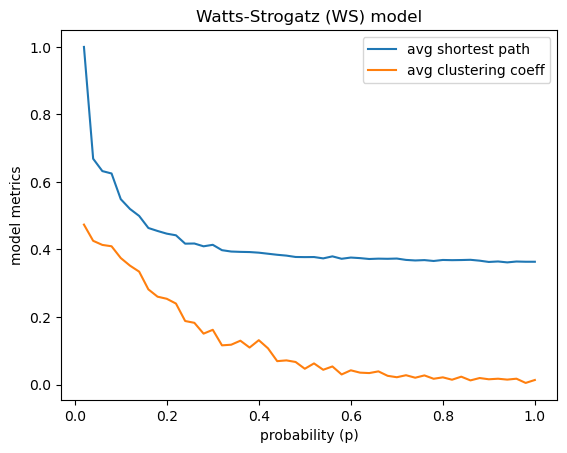

In [31]:
# ---*--- Watts-Strogatz (WS) model ---*---
# --> Plot the clustering coefficient and the average shortest-path as a function of the parameter p of the WS model.

n = 200 # nodes
p_list = np.arange(0.02,1.02,0.02)
k = 5

avg_shortest_path = []
avg_clustering_coeff = []

for p in p_list:
    ws_model = nx.watts_strogatz_graph(n, k, p, seed=42069)
    avg_shortest_path.append(nx.average_shortest_path_length(ws_model))
    avg_clustering_coeff.append(nx.average_clustering(ws_model))

# normalizing average shortest path
max_shortest_path = max(avg_shortest_path)
avg_shortest_path = [path/max_shortest_path for path in avg_shortest_path]
 
plt.plot(p_list, avg_shortest_path, label='avg shortest path')
plt.plot(p_list, avg_clustering_coeff, label='avg clustering coeff')
plt.title('Watts-Strogatz (WS) model')
plt.xlabel('probability (p)')
plt.ylabel('model metrics')
plt.legend(loc='upper right')
plt.show()

2. Plot the average shortest-path length as a function of the network size of the ER model.
    - you will have to experiment with appropriate values of p which may depend on the parameter n. You will notice that for large values of n your code may take too long, compute values for n that are reasonable for you. Also, make sure that you chose values for p that result (with high probability) in connected graphs. To achieve this, you can use a result from stating (in the following, think of ε as a small positive real number):
        - If p < ( (1−ε) ln n / n ) then a graph in G(n, p) will almost surely contain isolated vertices, and thus be disconnected
        - If p > ( (1+ε) ln n / n ) then a graph in G(n, p) will almost surely be connected

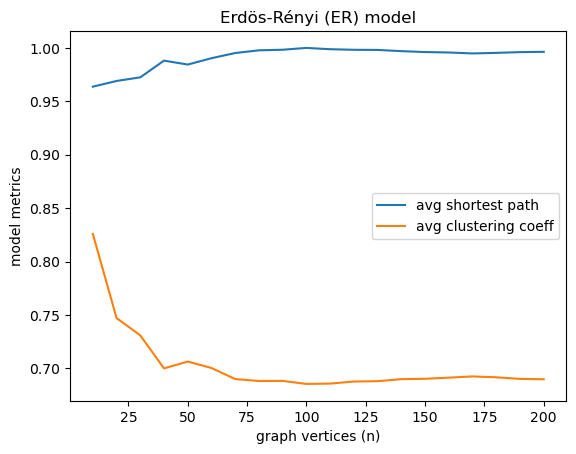

In [42]:
# ---*--- Erdös-Rényi (ER) model ---*---
# --> Plot the average shortest-path length as a function of the network size of the ER model.

n_list = np.arange(10, 210, 10) # nodes
p = 0.69

avg_shortest_path = []
avg_clustering_coeff = []

for n in n_list:
    er_model = nx.erdos_renyi_graph(n, p, seed=42069, directed=False)
    avg_shortest_path.append(nx.average_shortest_path_length(er_model))
    avg_clustering_coeff.append(nx.average_clustering(er_model))

# normalizing average shortest path
max_shortest_path = max(avg_shortest_path)
avg_shortest_path = [path/max_shortest_path for path in avg_shortest_path]
 
plt.plot(n_list, avg_shortest_path, label='avg shortest path')
plt.plot(n_list, avg_clustering_coeff, label='avg clustering coeff')
plt.title('Erdös-Rényi (ER) model')
plt.xlabel('graph vertices (n)')
plt.ylabel('model metrics')
plt.legend(loc='right')
plt.show()

3. Plot a histogram of the degree distribution of a BA network. What distribution does this follow? Can you describe it?
    - choose a network that is large enough so that results are what is expected from this model.

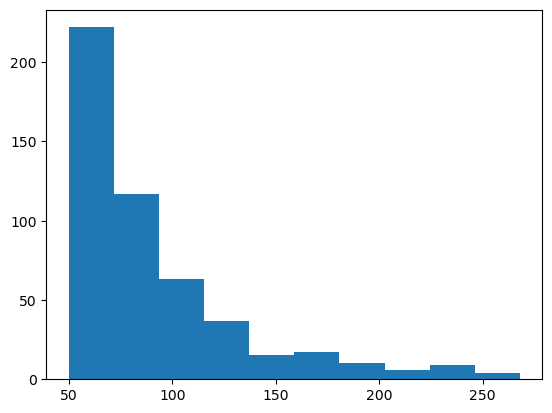

In [52]:
# ---*--- Barabasi-Albert (BA) model ---*---
# --> Plot a histogram of the degree distribution of a BA network. What distribution does this follow? Can you describe it?

n = 500 # nodes
m = 50

ba_model = nx.barabasi_albert_graph(n, m, seed=42069, initial_graph=None)

def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()

plot_degree_dist(ba_model)
